# Homework 9
### ASTR-324, Spring 2017, Ivezic & Juric, University of Washington
https://github.com/uw-astr-324-s17/astr-324-s17


## Problem

Use Kernel Density Estimation with a top-hat, Gaussian, and exponential kernel on the color-magnitude diagrams (CMDs) of the two data sets (`Field A` and `Field B`) from Homework 7. Make the analog of Figure 6.3 from the textbook (the code for that figure is included below), but with the CMDs in each panel (i.e., $g-r$ on the $x$, and $g$ on the $y$ axis).

Experiment with different kernel bandwidths, plotting one that visually seems "best" (i.e., a good balance of bias vs. variance) for each kernel.

Don't forget to change the figure size so that individual panels have aspect ratios closer to what is common for color-magnitude diagrams (i.e., x:y $\approx$ 4:6 or so).

## Solution

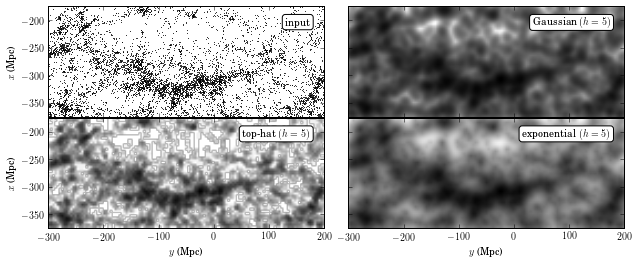

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, Normalize

from scipy.spatial import cKDTree
from scipy.stats import gaussian_kde

from astroML.datasets import fetch_great_wall

from sklearn.neighbors import KernelDensity

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=10, usetex=True)

#------------------------------------------------------------
# Fetch the great wall data
X = fetch_great_wall()

#------------------------------------------------------------
# Create  the grid on which to evaluate the results
Nx = 50
Ny = 125
xmin, xmax = (-375, -175)
ymin, ymax = (-300, 200)

#------------------------------------------------------------
# Evaluate for several models
Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                            np.linspace(ymin, ymax, Ny)))).T

kernels = ['gaussian', 'tophat', 'exponential']
dens = []

kde1 = KernelDensity(5, kernel='gaussian')
log_dens1 = kde1.fit(X).score_samples(Xgrid)
dens1 = X.shape[0] * np.exp(log_dens1).reshape((Ny, Nx))

kde2 = KernelDensity(5, kernel='tophat')
log_dens2 = kde2.fit(X).score_samples(Xgrid)
dens2 = X.shape[0] * np.exp(log_dens2).reshape((Ny, Nx))

kde3 = KernelDensity(5, kernel='exponential')
log_dens3 = kde3.fit(X).score_samples(Xgrid)
dens3 = X.shape[0] * np.exp(log_dens3).reshape((Ny, Nx))

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 4.4))
fig.subplots_adjust(left=0.12, right=0.95, bottom=0.2, top=0.9,
                    hspace=0.01, wspace=0.01)

# First plot: scatter the points
ax1 = plt.subplot(221, aspect='equal')
ax1.scatter(X[:, 1], X[:, 0], s=1, lw=0, c='k')
ax1.text(0.95, 0.9, "input", ha='right', va='top',
         transform=ax1.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Second plot: gaussian kernel
ax2 = plt.subplot(222, aspect='equal')
ax2.imshow(dens1.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax2.text(0.95, 0.9, "Gaussian $(h=5)$", ha='right', va='top',
         transform=ax2.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Third plot: top-hat kernel
ax3 = plt.subplot(223, aspect='equal')
ax3.imshow(dens2.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax3.text(0.95, 0.9, "top-hat $(h=5)$", ha='right', va='top',
         transform=ax3.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))
ax3.images[0].set_clim(0.01, 0.8)

# Fourth plot: exponential kernel
ax4 = plt.subplot(224, aspect='equal')
ax4.imshow(dens3.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax4.text(0.95, 0.9, "exponential $(h=5)$", ha='right', va='top',
         transform=ax4.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(ymin, ymax - 0.01)
    ax.set_ylim(xmin, xmax)

for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax3, ax4]:
    ax.set_xlabel('$y$ (Mpc)')

for ax in [ax2, ax4]:
    ax.yaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax1, ax3]:
    ax.set_ylabel('$x$ (Mpc)')

plt.show()

Retrieve the data set from HW 7

fieldA Query:
SELECT
  s.objID,s.b,s.l,s.dered_g,s.dered_r into mydb.MyTable from Star AS s,
  dbo.fGetNearbyObjEq(341.6,31.7,60) AS r
WHERE
  r.objID = s.objID



fieldB Query:
SELECT
  s.objID,s.b,s.l,s.dered_g,s.dered_r into mydb.MyTable from Star AS s,
  dbo.fGetNearbyObjEq(115.2,32.7,60) AS r
WHERE
  r.objID = s.objID

In [2]:
import numpy as np
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt
% matplotlib inline

# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

try:
    from sklearn.neighbors import KernelDensity
    use_sklearn_KDE = True
except:
    import warnings
    warnings.warn("KDE will be removed in astroML version 0.3.  Please "
                  "upgrade to scikit-learn 0.14+ and use "
                  "sklearn.neighbors.KernelDensity.", DeprecationWarning)
    from astroML.density_estimation import KDE
    use_sklearn_KDE = False

In [3]:
# Create connection to HW7.db that contains fieldA and fieldB
con = sqlite3.connect("HW7.db")

In [4]:
# Write fieldA to a dataframe
resultA = pd.read_sql("""
    SELECT
        fieldA.objID, fieldA.b, fieldA.l, fieldA.dered_g, fieldA.dered_r
    FROM
        fieldA
""", con)

In [5]:
# Write fieldB to a dataframe
resultB = pd.read_sql("""
    SELECT
        fieldB.objID, fieldB.b, fieldB.l, fieldB.dered_g, fieldB.dered_r
    FROM
        fieldB
""", con)

In [6]:
# Close the database
con.close()

In [7]:
def color_vect(result1, result2):
    """
    Input:
        result1: Vector from fieldA that contains objID,b,l,dered_g,dered_r
        result2: Vector from fieldB that contains objID,b,l,dered_g,dered_r
    Output:
        new_vect1: Numpy array of fieldA consisting of dered g and g-r
        new_vect2: Numpy array of fieldA consisting of dered g and g-r
    """
    
    new_vect1 = []
    new_vect2 = []
    g_r1 = result1['dered_g'] - result1['dered_r']
    g1 = result1['dered_g']
    g_r2 = result2['dered_g'] - result2['dered_r']
    g2 = result2['dered_g']
    
    for i in range(len(g1)):
        tmp_vect = []
        tmp_vect.append(g_r1[i])
        tmp_vect.append(g1[i])
        new_vect1.append(tmp_vect)
        
    for i in range(len(g2)):
        tmp_vect = []
        tmp_vect.append(g_r2[i])
        tmp_vect.append(g2[i])
        new_vect2.append(tmp_vect)   
        
    return np.array(new_vect1), np.array(new_vect2)

fieldAVect, fieldBVect = color_vect(resultA,resultB)
#fieldAVect = fieldAVect[:10000]
#fieldBVect = fieldBVect[:10000]

In [8]:
try:
    from sklearn.neighbors import KernelDensity
    use_sklearn_KDE = True
except:
    import warnings
    warnings.warn("KDE will be removed in astroML version 0.3.  Please "
                  "upgrade to scikit-learn 0.14+ and use "
                  "sklearn.neighbors.KernelDensity.", DeprecationWarning)
    from astroML.density_estimation import KDE
    use_sklearn_KDE = False

In [9]:
def dens_calc(dat,datgrid,h,Nx,Ny):
    """
    Input:
        dat: Data set
        datgrid: Data grid
        h: h value
        Nx: Number of iterations on x
        Ny: Number of iterations on y
        
    Output:
        dens1: Gaussian kernel density 
        dens2: Tophat kernel density
        dens3: Exponential kernel density
    """
    
    kde1 = KernelDensity(h, kernel='gaussian')
    log_dens1 = kde1.fit(dat).score_samples(datgrid)
    dens1 = dat.shape[0] * np.exp(log_dens1).reshape((Nx, Ny))

    kde2 = KernelDensity(h, kernel='tophat')
    log_dens2 = kde2.fit(dat).score_samples(datgrid)
    dens2 = dat.shape[0] * np.exp(log_dens2).reshape((Nx, Ny))

    kde3 = KernelDensity(h, kernel='exponential')
    log_dens3 = kde3.fit(dat).score_samples(datgrid)
    dens3 = dat.shape[0] * np.exp(log_dens3).reshape((Nx, Ny))

    return dens1, dens2, dens3

In [10]:
# Define values for calculating the densities

h=0.03
Nx = 200
Ny = 200
xmin, xmax = (-0.5,2)
ymin, ymax = (22,14)
Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                            np.linspace(ymin, ymax, Ny)))).T

In [11]:
# Use function dens_calc to calculate the gaussian, tophat, and exponential
# density functions

gaussA, tophatA, expA = dens_calc(fieldAVect,Xgrid,h,Nx,Ny)
gaussB, tophatB, expB = dens_calc(fieldBVect,Xgrid,h,Nx,Ny)

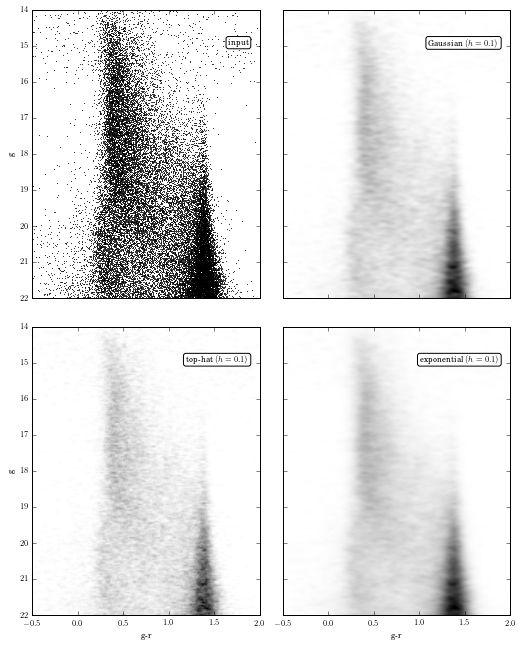

In [12]:
# Plot the results
fig = plt.figure(figsize=(8, 12))
fig.subplots_adjust(left=0.12, right=0.95, bottom=0.2, top=0.9,
                    hspace=0.1, wspace=0.1)

# First plot: scatter the points
ax1 = plt.subplot(221, aspect='auto')
ax1.scatter(fieldAVect[:, 0], fieldAVect[:, 1], s=1, lw=0, c='k')
ax1.text(0.95, 0.9, "input", ha='right', va='top',
         transform=ax1.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Second plot: gaussian kernel
ax2 = plt.subplot(222)
ax2.imshow(gaussA, origin='lower', norm=Normalize(),aspect='auto',
           extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)
ax2.text(0.95, 0.9, "Gaussian $(h=0.1)$", ha='right', va='top',
         transform=ax2.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Third plot: top-hat kernel
ax3 = plt.subplot(223)
ax3.imshow(tophatA, origin='lower', norm=Normalize(),aspect='auto',
           extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)
ax3.text(0.95, 0.9, "top-hat $(h=0.1)$", ha='right', va='top',
         transform=ax3.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))
#ax3.images[0].set_clim(0.01, 0.8)

# Fourth plot: exponential kernel
ax4 = plt.subplot(224)
ax4.imshow(expA, origin='lower', norm=Normalize(),aspect='auto',
           extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)
ax4.text(0.95, 0.9, "exponential $(h=0.1)$", ha='right', va='top',
         transform=ax4.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
                          
for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax3, ax4]:
    ax.set_xlabel('g-r')

for ax in [ax2, ax4]:
    ax.yaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax1, ax3]:
    ax.set_ylabel('g')

plt.show()

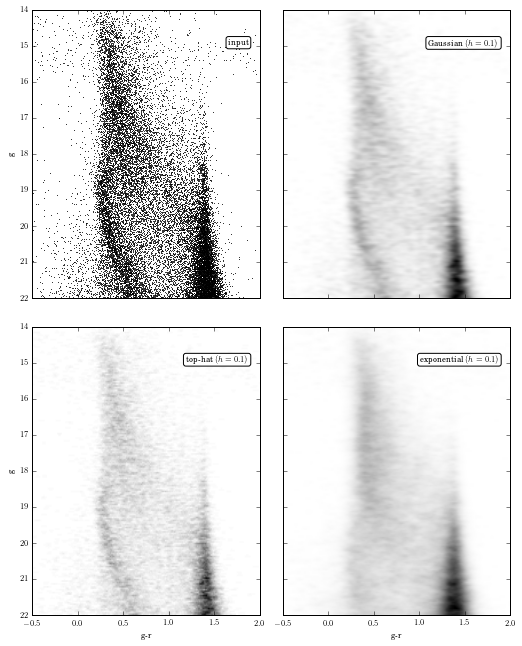

In [14]:
# Plot the results
fig = plt.figure(figsize=(8, 12))
fig.subplots_adjust(left=0.12, right=0.95, bottom=0.2, top=0.9,
                    hspace=0.1, wspace=0.1)

# First plot: scatter the points
ax1 = plt.subplot(221, aspect='auto')
ax1.scatter(fieldBVect[:, 0], fieldBVect[:, 1], s=1, lw=0, c='k')
ax1.text(0.95, 0.9, "input", ha='right', va='top',
         transform=ax1.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Second plot: gaussian kernel
ax2 = plt.subplot(222)
ax2.imshow(gaussB, origin='lower', norm=Normalize(),aspect='auto',
           extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)
ax2.text(0.95, 0.9, "Gaussian $(h=0.1)$", ha='right', va='top',
         transform=ax2.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Third plot: top-hat kernel
ax3 = plt.subplot(223)
ax3.imshow(tophatB, origin='lower', norm=Normalize(),aspect='auto',
           extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)
ax3.text(0.95, 0.9, "top-hat $(h=0.1)$", ha='right', va='top',
         transform=ax3.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))
#ax3.images[0].set_clim(0.01, 0.8)

# Fourth plot: exponential kernel
ax4 = plt.subplot(224)
ax4.imshow(expA, origin='lower', norm=Normalize(),aspect='auto',
           extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)
ax4.text(0.95, 0.9, "exponential $(h=0.1)$", ha='right', va='top',
         transform=ax4.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
                          
for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax3, ax4]:
    ax.set_xlabel('g-r')

for ax in [ax2, ax4]:
    ax.yaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax1, ax3]:
    ax.set_ylabel('g')

plt.show()